In [1]:
import time
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd                  # For dataframes
from jupyterplot import ProgressPlot # For realtime self-updating time-series plot
import seaborn as sns                # For minimal code but beautiful static plot
from datetime import datetime

In [2]:
%matplotlib inline

In [23]:
f = open("/proc/net/wireless", "r") # In Linux Ubuntu, instantaneous network data is stored in the file "/proc/net/wireless"

In [36]:
def seekdBm():
    # Function simply reads the wireless info file and outputs power in dBm every time it is called
    f.seek(162)                        # Seek value takes the byte number to navigate to the second line of the file pointed by 'f'
    power = f.readline().split(" ")[6] # The line is read and split to isolate the location containing the instantaneous power lever value
    return float(power)                # Convert the string to float and return


def wifitimeseries(step,steps):
    # Sample the Wifi signal (read wireless info file) for a given step-size and total number of steps
    t0 = datetime.now()  # Save starting time as zero reference
    ti, power = datetime.now()-t0, seekdBm() # Obtain current time (referenced to zero time above) and signal strength
    #ti=datetime.now()
    print(ti)
    df = pd.DataFrame(data={'Time':[ti], 'Power':[power]})  # Initialize a dataframe to store the time-series pair
    pp = ProgressPlot() # Initialize ProgressPlot for real-time plotting
    for i in range(steps):  # Loop over number of steps
        ti, power = datetime.now()-t0, seekdBm() # Obtain elapsed time and current wifi power level
        pp.update(power)  # Update the real-time time-series plot
        df = df.append({'Time':ti, 'Power':power}, ignore_index=True) # Store in dataframe
        time.sleep(step)  # Wait for the time corresponding to step-size and repeat loop
    pp.finalize() # After the loop ends, retain the final state of the time-series plot
    return df     # Return the dataframe containing the collected data

In [43]:
# Syntax for real-time plotting and data collection function: wifitimeseries(time-step,Number-of-steps)
sampledf = wifitimeseries(0.5,50)  # Data stored in sampledf as a Pandas dataframe
avg=np.mean(sampledf['Power'])
avg

0:00:00.000016


64.96078431372548

In [8]:
sampledf



,Time,Power
0,00:00:00.000019,68.0
1,00:00:00.040804,68.0
2,00:00:00.555510,68.0
3,00:00:01.066009,68.0
4,00:00:01.576410,68.0
5,00:00:02.086008,68.0
6,00:00:02.597723,68.0
7,00:00:03.107430,68.0
8,00:00:03.617841,68.0
9,00:00:04.127544,70.0


Text(0, 0.5, 'Power(dBm)')

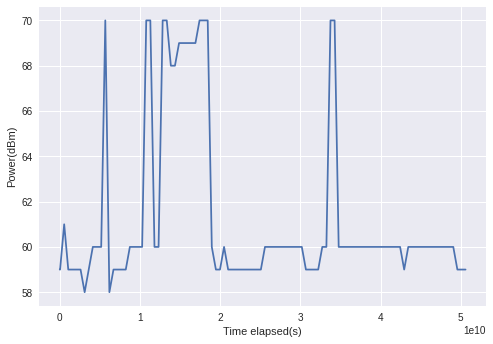

In [80]:
plt.style.use('seaborn')
tsplot = plt.plot(sampledf['Time'], sampledf['Power'])
plt.xlabel('Time elapsed(s)')
plt.ylabel('Power(dBm)')

In [7]:
# View the dataframe
#sampledf # List the first 10 entries from the dataframe

sns.set_theme(style="darkgrid")
# Plot the responses for different events and regions
tsplot = sns.lineplot(x="Time", y="Power",data=sampledf)
tsplot.set(xlabel='Time elapsed (s)', ylabel='Power (dBm)')
sns.reset_orig()

Text(0, 0.5, 'Power(dBm)')

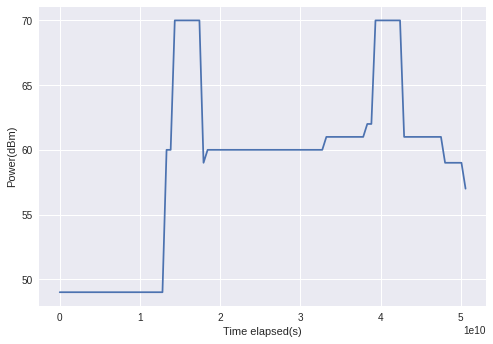

In [36]:
plt.style.use('seaborn')
tsplot = plt.plot(sampledf['Time'], sampledf['Power'])
plt.xlabel('Time elapsed(s)')
plt.ylabel('Power(dBm)')

In [23]:
avg=np.mean(sampledf['Power'])

In [24]:
avg

50.57425742574257

In [62]:
final=pd.DataFrame()

In [63]:
final['Power']=([67.545,65.545,64.178,61.897,58.851,54.191, 53.6732, 51.8314])
final['Distance']=([0.1,0.25,0.5,0.75,1,1.25,1.5,1.75])
final['logPower']=np.log10([67.545,65.545,64.178,61.897,58.851,54.191, 53.6732, 51.8314])
final['logDistance']=np.log10([0.1,0.25,0.5,0.75,1,1.25,1.5,1.75])

In [8]:
final

,Power,Distance,logPower,logDistance
0,67.5450,0.10,1.829593,-1.000000
1,65.5450,0.25,1.816540,-0.602060
2,64.1780,0.50,1.807386,-0.301030
3,61.8970,0.75,1.791670,-0.124939
4,58.8510,1.00,1.769754,0.000000
5,54.1910,1.25,1.733927,0.096910
6,53.6732,1.50,1.729757,0.176091
7,51.8314,1.75,1.714593,0.243038


In [64]:
linFIT = np.polyfit(final.logDistance,final.Power,1)
linFIT

array([-12.84533652,  57.28619841])

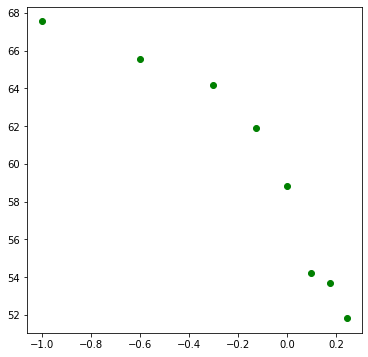

In [65]:
plt.figure(figsize=[6,6])
plt.scatter(final.logDistance,final.Power,color='Green')

In [26]:
final2=pd.DataFrame()
np.arange(0,0.9,0.05)

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85])

In [34]:
final2['Power']=([31,29,40,37,32,30,38,35,32,35,38,31,32,36,31,33])
final2['Distance']=(np.arange(0.1,0.9,0.05))
final2['logPower']=np.log10(final2.Power)
final2['logDistance']=np.log10(final2.Distance)

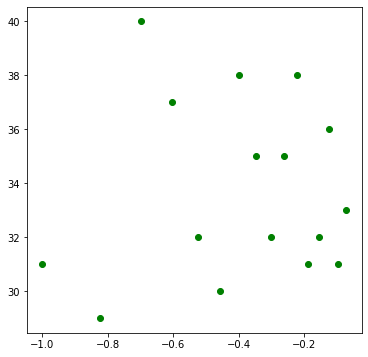

In [35]:
plt.figure(figsize=[6,6])
plt.scatter(final2.logDistance,final2.Power,color='Green')
#plt.plot(final.logDistance,linFIT[0]*final.logDistance+linFIT[1],color='Red')

In [ ]:
plt.figure(figsize=[6,6])
plt.scatter(final.logDistance,final.Power,color='Green')
plt.plot(final.logDistance,linFIT[0]*final.logDistance+linFIT[1],color='Red')

# Back reflector




In [3]:
BR=pd.DataFrame()
BR['Power']=([-60,-56,-51,-49,-48,-47,-46,-46])
BR['Distance']=np.arange(0.25,2.25,0.25)

In [7]:
BR


,Power,Distance
0,-60,0.25
1,-56,0.50
2,-51,0.75
3,-49,1.00
4,-48,1.25
5,-47,1.50
6,-46,1.75
7,-46,2.00


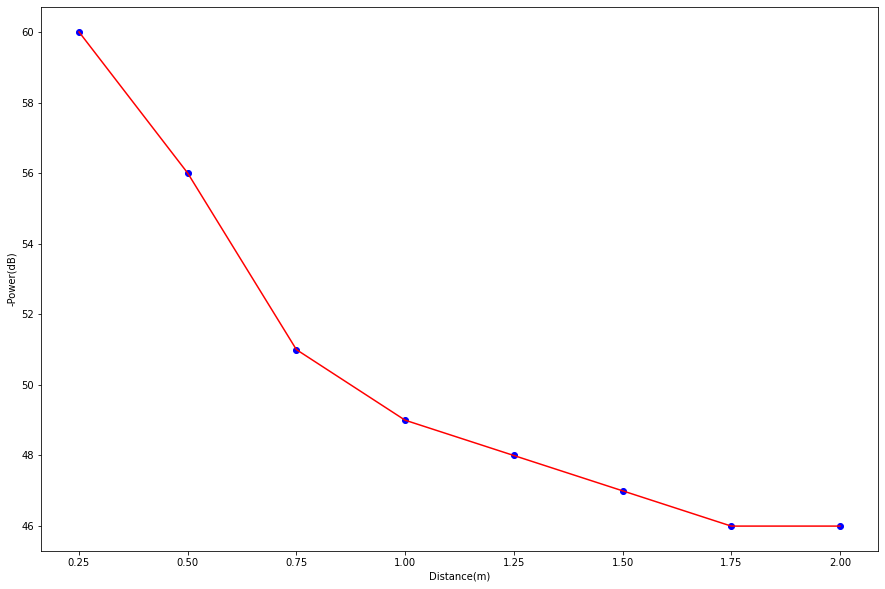

In [98]:
plt.figure(figsize=[15,10])

plt.scatter(BR.Distance,abs(BR.Power),color='Blue')
plt.plot(BR.Distance,abs(BR.Power),color="red")
plt.xlabel('Distance(m)')
plt.ylabel('-Power(dB)')
plt.savefig("BR.jpeg")

In [ ]:
ax1.plot((np.log(np.arange(0,3,0.25)) / np.log(10**0.1)),-(linFIT[0]*(np.log(np.arange(0,3,0.25)) / np.log(10**0.1))+linFIT[1]),color='Red')


In [22]:
PD=pd.DataFrame()
PD['Power']=([-30,-34,-37,-39,-41,-43,-46,-50])
PD['Distance']=np.arange(0.25,2.25,0.25)

In [33]:
PD

,Power,Distance
0,-30,0.25
1,-34,0.50
2,-37,0.75
3,-39,1.00
4,-41,1.25
5,-43,1.50
6,-46,1.75
7,-50,2.00


In [70]:
X=(np.log(PD.Distance) / np.log(10**0.1))
linFIT1 = np.polyfit(X,PD.Power,1)
linFIT1

array([ -2.03532357, -40.53671332])

/home/vysakh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


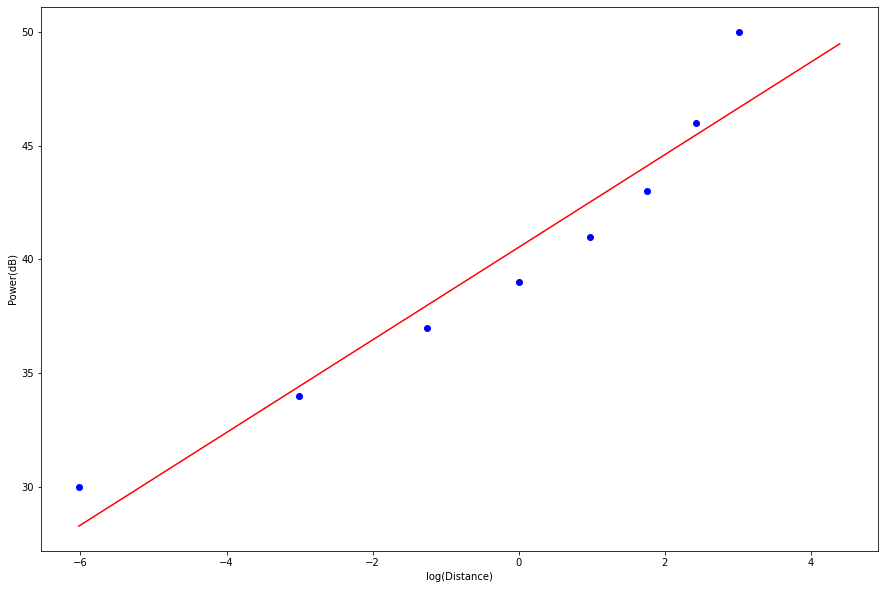

In [97]:
plt.figure(figsize=[15,10])
plt.scatter(X,-PD.Power,color='Blue')
plt.plot((np.log(np.arange(0,3,0.25)) / np.log(10**0.1)),-(linFIT[0]*(np.log(np.arange(0,3,0.25)) / np.log(10**0.1))+linFIT[1]),color='Red')
plt.xlabel('log(Distance)')
plt.ylabel('Power(dB)')
plt.savefig("PD.jpeg")

In [57]:
-8.83929797*np.log(10)

-20.353235738254533

In [60]:
linFIT[0]*np.log(np.arange(0,3,0.25))

/home/vysakh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


array([        inf, 12.25386893,  6.12693447,  2.54290756, -0.        ,
       -1.97243234, -3.58402691, -4.9466107 , -6.12693447, -7.16805381,
       -8.09936681, -8.94184189])